In [529]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
    
def activation(X):
    return 1.0 / (1.0 + np.exp(-np.clip(X, -250, 250)))
    
def probability(X, w):
    return activation(X @ w)
    
def prediction(X, w):
    return np.where(prob(X, w) >= 0.5, 1, 0)

def plot(min, max, w, res=0.1, fn=prediction):
    X = []
    for x in np.arange(max, min - res, -res):
        for y in np.arange(min, max + res, res):
            X.append([-1, x, y, x**2, y**2, x**3, y**3])
    X = np.array(X)
    sc = StandardScaler()
    X = np.concatenate((X[:,0].reshape(-1, 1), sc.fit_transform(X[:,1].reshape(-1, 1)), sc.fit_transform(X[:,2].reshape(-1, 1)), sc.fit_transform(X[:,3].reshape(-1, 1)), sc.fit_transform(X[:,4].reshape(-1, 1)), sc.fit_transform(X[:,5].reshape(-1, 1)), sc.fit_transform(X[:,6].reshape(-1, 1))), axis=1)
    plt.imshow(fn(X, w).reshape(int((max - min) / res) + 1, int((max - min) / res) + 1), interpolation='gaussian', cmap='binary', extent=[min, max, min, max])
    
def plot_prob(min, max, w, res=0.1):
    plot(min, max, w, res=res, fn=probability)

def plot_pred(min, max, w, res=0.1):
    plot(min, max, w, res=res, fn=prediction)

In [585]:
randX = np.random.rand(7, 1) * np.random.randint(-10, 10, size=(7, 1))

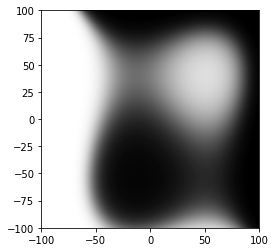

In [586]:
plot_prob(-100, 100, randX, res=1)

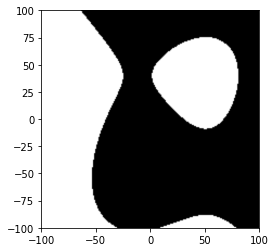

In [587]:
plot_pred(-100, 100, randX, res=1)